# NNIA: Tutorial 3 - 28.11.2017

In [1]:
# Set notebook to full width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Organizational things
### General
* Please use correct **file names**, etc. We use automatic scripts to download and send you graded submissions back. If you don't follow the submission guidelines, then your homework can be lost.
* Please send as a submission a **single .ipynb file**.
* There is only **one exception** to this rule: **Images**.
    * Use markown syntax to include the image in the notebook.
    * Attach the image file to the email.
* Only the last submission counts. In is OK to send multiple submissions as long as deadline is **not** violated.

## However: Subject line should always start with [NNIA][assignment-i]

where $i$ is the id of the current assignment sheet.

---

## Assignment-3

#### 1. Numerical Problems in Deep Learning

#### 2. Principal Component Analysis (PCA)

In [2]:
import numpy as np
# %matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# Specify first data set
A = np.asarray([[2.0, 4.0], [2.0, 2.0], [3.0, 1.0], [5.0, 1.0]], dtype=np.float32)
print('Original data:')
print(A)

Original data:
[[ 2.  4.]
 [ 2.  2.]
 [ 3.  1.]
 [ 5.  1.]]


In [4]:
# Plot data
fig, axes = plt.subplots()
# plot coordinate system
axes.axhline(0, ls='--', linewidth=0.5)
axes.axvline(0, ls='--', linewidth=0.5)
axes.set_xlim(-6.0, 6.0)
axes.set_ylim(-6.0, 6.0)
# Plot data points
axes.scatter(A[:, 0], A[:, 1], s=1e2, label='original data')
axes.set_title('Data set A');

In [5]:
# Compute the mean along each axes
x_mean = np.mean(A[:, 0])
y_mean = np.mean(A[:, 1])

# Center data
A[:, 0] = A[:, 0] - x_mean
A[:, 1] = A[:, 1] - y_mean

print('Centered data:')
print(A)

Centered data:
[[-1.  2.]
 [-1.  0.]
 [ 0. -1.]
 [ 2. -1.]]


In [6]:
# Add centered data to the plot
axes.scatter(A[:, 0], A[:, 1], marker='X', s=1e2, label='centerd data');

In [7]:
# Create covariance matrix of the centered data
C = np.matmul(A.T, A)
print('Covariance matrix of the centered data:')
print(C)

Covariance matrix of the centered data:
[[ 6. -4.]
 [-4.  6.]]


In [8]:
# Compute eigenvalues and eigenvectors of the covariance matrix
u, s, v = np.linalg.svd(C)
print('Eigendecomposition of the covariance matrix:')
print(u)
print(s)
print(v)

Eigendecomposition of the covariance matrix:
[[-0.70710677  0.70710677]
 [ 0.70710677  0.70710677]]
[ 10.   2.]
[[-0.70710677  0.70710677]
 [ 0.70710677  0.70710677]]


In [9]:
# Encode data
E = np.dot(A, u[0])
print('Encoded data:')
print(E)

Encoded data:
[ 2.12132025  0.70710677 -0.70710677 -2.12132025]


In [10]:
# Add encoded data to the plot
axes.scatter(E, np.zeros(len(E)), marker='x', s=1e2, label='compressed data');

In [11]:
# Reconstruct data
E = np.reshape(E, newshape=(4, 1))
g = np.reshape(u[0], newshape=(2, 1))

D = np.dot(g, E.T)
D = D.T
print('Reconstructed data:')
print(D)

Reconstructed data:
[[-1.49999988  1.49999988]
 [-0.49999997  0.49999997]
 [ 0.49999997 -0.49999997]
 [ 1.49999988 -1.49999988]]


In [12]:
# Add reconstructed data to the plot
axes.scatter(D[:, 0], D[:, 1], marker='+', s=1e2, label='reconstructed data');

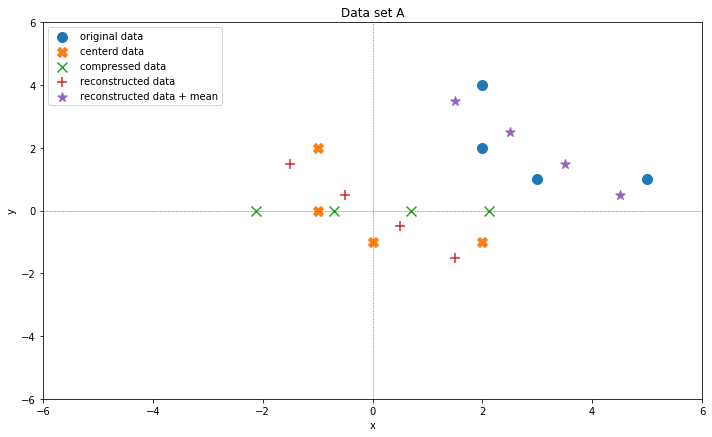

In [13]:
# Add mean to the reconstructed data
D[:, 0] = D[:, 0] + x_mean
D[:, 1] = D[:, 1] + y_mean

# Add data to the plot
axes.scatter(D[:, 0], D[:, 1], marker='*', s=1e2, label='reconstructed data + mean')

axes.set_xlabel('x')
axes.set_ylabel('y')

axes.legend(loc='upper left')

# Specify size and layout
width  = 10.0
height = width / 1.618
fig.set_size_inches(width, height)
plt.tight_layout()
plt.show()

#### 3. Gradient descent vs. Newtons method

#### 4. Visualization of gradient descent

#### 5. Linear Algebra bonus

---

## Matplotlib Tutorial

Check [this tutorial](http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb) for a great introduction.

Some advices:
* Create figure and axes objects explicitly using `plt.subplots()` [function](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html?highlight=matplotlib%20pyplot%20subplots#matplotlib.pyplot.subplots)
* Use plotting functions such as `scatter()` on the axes object instead of calling `plt.scatter()`.
* Always use `scatter()` instead of `plot()` when producting scatter plots.
* Use `plt.tight_layout()` to avoid overlapping labels and axes.
* Matplotlib API can be very confusing, a good starting point is the [documentation](https://matplotlib.org/api/axes_api.html) of the axes class.
* Matplotlib supports $\LaTeX$ [rendering](https://matplotlib.org/users/usetex.html)
* Always use %matplotlib inline magic inside jupyter notebooks.
* Use `;` to surpress output produced by calling matplotlib functions.
* In case you don't like the default style, checkout the styles [reference](https://matplotlib.org/devdocs/gallery/style_sheets/style_sheets_reference.html).

Example:

In [14]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# Enable latex support 
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Palatino']}) # let's use a serif font
rc('text', usetex=True)

In [15]:
# Create some data
mean1 = [0, 0]
cov1 = [[1, 0], [0, 2]]
x1, y1 = np.random.multivariate_normal(mean1, cov1, 1000).T

mean2 = [3, 3]
cov2 = [[1.5, 0], [0, 1]]
x2, y2 = np.random.multivariate_normal(mean2, cov2, 1000).T

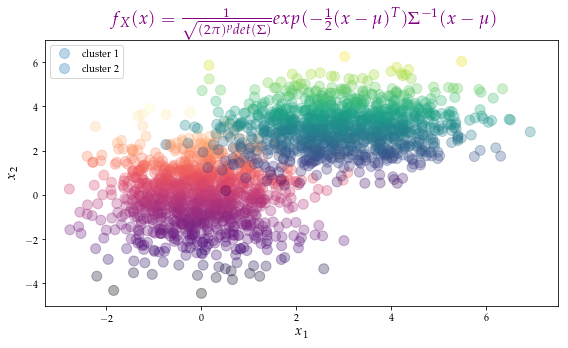

In [16]:
# Let's create a figure
fig, axes = plt.subplots(nrows=1, ncols=1)
axes.set_title(r"$f_X(x) = \frac{1}{\sqrt{(2\pi)^p det(\Sigma)}} exp(- \frac{1}{2}(x - \mu)^T) \Sigma^{-1}(x - \mu)$",
          fontsize=18, color='purple')
axes.scatter(x1, y1, marker='o', alpha=0.3, label=r"cluster $1$", c=y1, s=1e2, cmap='magma')
axes.scatter(x2, y2, marker='o', alpha=0.3, label=r"cluster $2$", c=y2, s=1e2, cmap='viridis')

axes.set_xlabel(r"$x_1$", fontsize=14)
axes.set_ylabel(r"$x_2$", fontsize=14)

# Display legend
axes.legend(loc='upper left')

# Specify size and layout
width  = 8.0
height = width / 1.618
fig.set_size_inches(width, height)
plt.tight_layout();

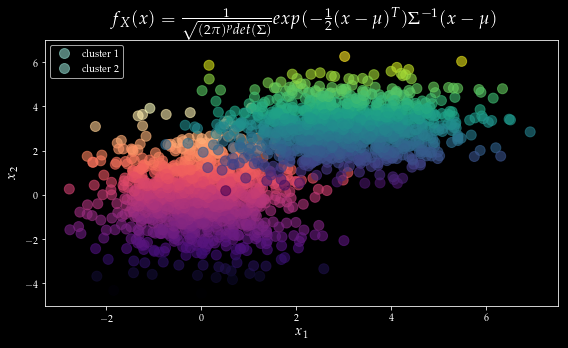

In [17]:
# Let's create a figure using a particular style
with plt.style.context('dark_background'):
    fig, axes = plt.subplots(nrows=1, ncols=1)
    axes.set_title(r"$f_X(x) = \frac{1}{\sqrt{(2\pi)^p det(\Sigma)}} exp(- \frac{1}{2}(x - \mu)^T) \Sigma^{-1}(x - \mu)$",
              fontsize=18, color='white')
    axes.scatter(x1, y1, marker='o', alpha=0.6, label=r"cluster $1$", c=y1, s=1e2, cmap='magma')
    axes.scatter(x2, y2, marker='o', alpha=0.6, label=r"cluster $2$", c=y2, s=1e2, cmap='viridis')

    axes.set_xlabel(r"$x_1$", fontsize=14)
    axes.set_ylabel(r"$x_2$", fontsize=14)

    # Display legend
    axes.legend(loc='upper left')

    # Specify size and layout
    width  = 8.0
    height = width / 1.618
    fig.set_size_inches(width, height)
    plt.tight_layout();

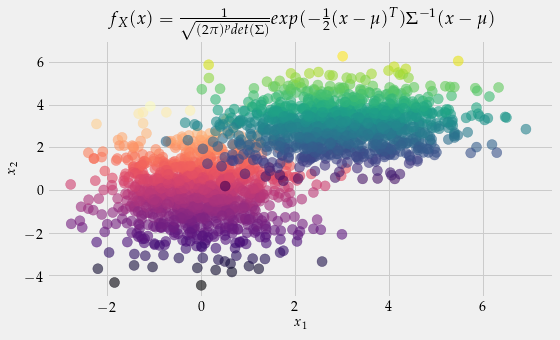

In [18]:
# Let's create a figure using a particular style
with plt.style.context('fivethirtyeight'):
    fig, axes = plt.subplots(nrows=1, ncols=1)
    axes.set_title(r"$f_X(x) = \frac{1}{\sqrt{(2\pi)^p det(\Sigma)}} exp(- \frac{1}{2}(x - \mu)^T) \Sigma^{-1}(x - \mu)$",
              fontsize=18, color='black')
    axes.scatter(x1, y1, marker='o', alpha=0.6, label=r"cluster $1$", c=y1, s=1e2, cmap='magma')
    axes.scatter(x2, y2, marker='o', alpha=0.6, label=r"cluster $2$", c=y2, s=1e2, cmap='viridis')

    axes.set_xlabel(r"$x_1$", fontsize=14)
    axes.set_ylabel(r"$x_2$", fontsize=14)

    # Display legend
    # axes.legend(loc='upper left')

    # Specify size and layout
    width  = 8.0
    height = width / 1.618
    fig.set_size_inches(width, height)
    plt.tight_layout();